# **Overview**

Using forex exchange rate historical data to analyze and predict fluctuations between the values of KES against USD

## **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

## **Dataset**

In [2]:
# Loading csv file into the dataframe
data = pd.read_csv('/kaggle/input/forex-exchange-rate-since-2004-updated-daily/daily_forex_rates.csv')

In [3]:
# Data overview
data.head(10)

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
5,GYD,EUR,Guyanaese Dollar,227.631403,2023-11-22
6,GTQ,EUR,Guatemalan Quetzal,8.517432,2023-11-22
7,GNF,EUR,Guinean Franc,9346.990346,2023-11-22
8,GMD,EUR,Gambian Dalasi,73.213701,2023-11-22
9,GIP,EUR,Gibraltar Pound,0.868294,2023-11-22


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320853 entries, 0 to 320852
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   currency       320853 non-null  object 
 1   base_currency  320853 non-null  object 
 2   currency_name  320853 non-null  object 
 3   exchange_rate  320853 non-null  float64
 4   date           320853 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.2+ MB


In [5]:
data.describe()

,exchange_rate
count,3.208530e+05
mean,3.863666e+03
std,9.357191e+04
min,2.876543e-05
25%,2.775700e+00
50%,1.713200e+01
75%,1.454249e+02
max,4.881841e+06


In [6]:
# Checking for null values
print(data.isnull().sum())

currency         0
base_currency    0
currency_name    0
exchange_rate    0
date             0
dtype: int64


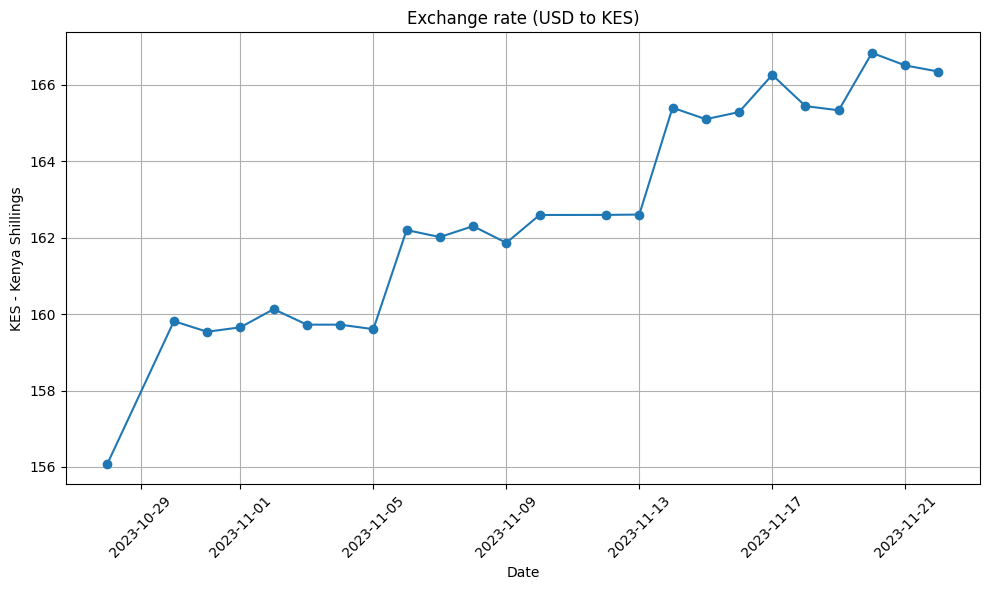

In [7]:
# Historical exchange rates between KES/USD
my_currency_index = data['currency'] == 'KES'
data.loc[my_currency_index, 'date'] = pd.to_datetime(data.loc[my_currency_index, 'date'])
my_currency = data[my_currency_index]                                  
my_currency = my_currency.sort_values(by='date')


plt.figure(figsize=(10, 6))
plt.plot(my_currency['date'], my_currency['exchange_rate'], marker = 'o', linestyle = '-')
plt.xlabel("Date")
plt.ylabel("KES - Kenya Shillings")
plt.title("Exchange rate (USD to KES)")                                                      
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()

